In [1]:
%reload_ext autoreload

%autoreload 2


In [12]:
input_file = "../../test_data/system_tests/MaxQuant_boxcar/evidence.txt.maxquant_evidence_benchmark.aq_reformat.tsv"
maxquant_file = "../../test_data/system_tests/MaxQuant_boxcar/proteinGroups.txt"
directlfq_file = "../../test_data/system_tests/MaxQuant_boxcar/evidence.txt.maxquant_evidence_benchmark.aq_reformat.tsv.protein_intensities.tsv"

samplemap_directlfq = "../../test_data/system_tests/MaxQuant_boxcar/samplemap.directLFQ.tsv"

samplemap_maxquant = "../../test_data/system_tests/MaxQuant_boxcar/samplemap.maxLFQ.tsv"

benchmark_figure = "../../test_data/system_tests/MaxQuant_boxcar/benchmark_mqset.pdf"

run_directlfq = False

In [3]:
if run_directlfq:
    import directlfq.lfq_manager as lfqmgr

    lfqmgr.run_lfq(input_file=input_file, input_type_to_use="maxquant_evidence_benchmark",maximum_number_of_quadratic_ions_to_use_per_protein=10, min_nonan=1)



In [4]:
import directlfq.benchmarking as lfqbenchmark
import directlfq.utils as lfqutils

samplemap_df_directlfq = lfqutils.load_samplemap(samplemap_directlfq)
samples_used_directlfq = lfqutils.get_samples_used_from_samplemap_df(samplemap_df_directlfq, cond1="dda12", cond2="dda2")
samplemap_df_maxlfq = lfqutils.load_samplemap(samplemap_maxquant)
samples_used_maxlfq = lfqutils.get_samples_used_from_samplemap_df(samplemap_df_maxlfq, cond1="dda12", cond2 = "dda2")

restable_directlfq = lfqbenchmark.ResultsTableDirectLFQ(input_file=directlfq_file, input_name="directLFQ", samples_c1=samples_used_directlfq[0], samples_c2=samples_used_directlfq[1])
restable_maxlfq = lfqbenchmark.ResultsTableMaxQuant(input_file=maxquant_file, input_name="maxLFQ", samples_c1=samples_used_maxlfq[0], samples_c2=samples_used_maxlfq[1])

/Users/constantin/workspace/directlfq/directlfq/benchmarking.py:153: RuntimeWarning: divide by zero encountered in log2
  self.formated_dataframe[self.log2fc_column] = [np.log2(x[0]) - np.log2(x[1]) for x in zip(self.formated_dataframe['median_intensity_c1'], self.formated_dataframe['median_intensity_c2'])]
/Users/constantin/workspace/directlfq/directlfq/benchmarking.py:153: RuntimeWarning: invalid value encountered in double_scalars
  self.formated_dataframe[self.log2fc_column] = [np.log2(x[0]) - np.log2(x[1]) for x in zip(self.formated_dataframe['median_intensity_c1'], self.formated_dataframe['median_intensity_c2'])]
/Users/constantin/workspace/directlfq/directlfq/benchmarking.py:153: RuntimeWarning: divide by zero encountered in log2
  self.formated_dataframe[self.log2fc_column] = [np.log2(x[0]) - np.log2(x[1]) for x in zip(self.formated_dataframe['median_intensity_c1'], self.formated_dataframe['median_intensity_c2'])]
/Users/constantin/workspace/directlfq/directlfq/benchmarking.py:

In [5]:
display(restable_directlfq.formated_dataframe)
display(restable_maxlfq.formated_dataframe)

,protein,BoxCar_02-01_1,BoxCar_02-01_2,BoxCar_02-01_3,BoxCar_12-01_1,BoxCar_12-01_2,BoxCar_12-01_3,Shotgun_02-01_1,Shotgun_02-01_2,Shotgun_02-01_3,Shotgun_12-01_1,Shotgun_12-01_2,Shotgun_12-01_3,median_intensity_c1,median_intensity_c2,log2fc,mean_intensity
0,0,2.257899e+09,2.410077e+09,2.511625e+09,2.591265e+09,2.457242e+09,2.510783e+09,2.775608e+09,2.304606e+09,2.463027e+09,2.265470e+09,2.286437e+09,2.875744e+09,2.286437e+09,2.463027e+09,-0.107331,2.374732e+09
1,0;3663,3.274410e+08,2.606695e+08,3.597413e+08,2.768075e+08,3.600023e+08,3.353921e+08,4.406753e+08,2.483700e+08,2.725829e+08,2.598782e+08,2.971673e+08,3.038433e+08,2.971673e+08,2.725829e+08,0.124580,2.848751e+08
2,1,3.823180e+09,3.699890e+09,3.555036e+09,3.933610e+09,3.989974e+09,3.897948e+09,4.289761e+09,3.725524e+09,3.808224e+09,4.150064e+09,3.901780e+09,3.697578e+09,3.901780e+09,3.808224e+09,0.035014,3.855002e+09
3,10,3.917296e+07,4.294315e+07,4.795124e+07,4.618124e+07,5.004754e+07,4.593951e+07,5.446880e+07,4.202327e+07,5.916033e+07,4.306951e+07,4.374203e+07,3.721607e+07,4.306951e+07,5.446880e+07,-0.338763,4.876916e+07
4,100,2.490582e+07,2.231715e+07,2.209774e+07,3.108957e+07,2.133094e+07,2.651085e+07,2.765747e+07,2.777500e+07,3.195396e+07,2.969610e+07,2.759661e+07,3.443514e+07,2.969610e+07,2.777500e+07,0.096487,2.873555e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7437,997,1.206981e+08,9.906806e+07,1.041248e+08,1.140037e+08,1.015086e+08,1.072625e+08,7.775727e+07,1.021988e+08,1.106388e+08,1.088244e+08,8.955785e+07,1.100630e+08,1.088244e+08,1.021988e+08,0.090624,1.055116e+08
7438,997;3796,3.803838e+08,3.570851e+08,3.352119e+08,4.496543e+08,3.877663e+08,3.253794e+08,3.675418e+08,3.396428e+08,3.482478e+08,3.376679e+08,3.564392e+08,3.107896e+08,3.376679e+08,3.482478e+08,-0.044509,3.429578e+08
7439,998,5.489532e+08,6.145592e+08,6.887377e+08,5.547813e+08,6.018622e+08,5.573788e+08,6.463951e+08,5.971909e+08,6.038915e+08,5.854444e+08,5.842673e+08,5.977491e+08,5.854444e+08,6.038915e+08,-0.044757,5.946679e+08
7440,999,0.000000e+00,0.000000e+00,4.407050e+07,0.000000e+00,3.714359e+07,4.177432e+07,0.000000e+00,0.000000e+00,4.831025e+07,0.000000e+00,3.960183e+07,4.218370e+07,3.960183e+07,0.000000e+00,inf,1.980091e+07


,LFQ intensity Shotgun_02-01_1,LFQ intensity Shotgun_02-01_2,LFQ intensity Shotgun_02-01_3,LFQ intensity Shotgun_12-01_1,LFQ intensity Shotgun_12-01_2,LFQ intensity Shotgun_12-01_3,protein,median_intensity_c1,median_intensity_c2,log2fc,mean_intensity
0,3643600000,2971500000,3188400000,3655800000,3605500000,4274800000,0,3.655800e+09,3.188400e+09,0.197355,3.422100e+09
1,5321900000,4503700000,4356100000,5657400000,5466200000,5410700000,1,5.466200e+09,4.503700e+09,0.279428,4.984950e+09
2,86756000,69719000,108880000,152760000,99195000,134370000,2,1.343700e+08,8.675600e+07,0.631176,1.105630e+08
3,317040000,421780000,412000000,444980000,503490000,385790000,3,4.449800e+08,4.120000e+08,0.111096,4.284900e+08
4,36886000,24031000,28317000,41376000,36666000,42425000,4,4.137600e+07,2.831700e+07,0.547126,3.484650e+07
...,...,...,...,...,...,...,...,...,...,...,...
6877,425360000,712670000,744970000,0,0,0,6877,0.000000e+00,7.126700e+08,-inf,3.563350e+08
6878,1869000000,1562200000,1564300000,2030200000,2050000000,2396400000,6878,2.050000e+09,1.564300e+09,0.390107,1.807150e+09
6879,96161000,86862000,123400000,51813000,122920000,119260000,6879,1.192600e+08,9.616100e+07,0.310586,1.077105e+08
6880,5546300000,5833600000,5821000000,6785000000,7053600000,7264400000,6880,7.053600e+09,5.821000e+09,0.277093,6.437300e+09


In [6]:
organism_annotator = lfqbenchmark.OrganismAnnotatorMaxQuant(mapping_file=maxquant_file)
display(restable_maxlfq.formated_dataframe)

organism_annotator.annotate_table_with_organism(restable_maxlfq)
organism_annotator.annotate_table_with_organism(restable_directlfq)

,LFQ intensity Shotgun_02-01_1,LFQ intensity Shotgun_02-01_2,LFQ intensity Shotgun_02-01_3,LFQ intensity Shotgun_12-01_1,LFQ intensity Shotgun_12-01_2,LFQ intensity Shotgun_12-01_3,protein,median_intensity_c1,median_intensity_c2,log2fc,mean_intensity
0,3643600000,2971500000,3188400000,3655800000,3605500000,4274800000,0,3.655800e+09,3.188400e+09,0.197355,3.422100e+09
1,5321900000,4503700000,4356100000,5657400000,5466200000,5410700000,1,5.466200e+09,4.503700e+09,0.279428,4.984950e+09
2,86756000,69719000,108880000,152760000,99195000,134370000,2,1.343700e+08,8.675600e+07,0.631176,1.105630e+08
3,317040000,421780000,412000000,444980000,503490000,385790000,3,4.449800e+08,4.120000e+08,0.111096,4.284900e+08
4,36886000,24031000,28317000,41376000,36666000,42425000,4,4.137600e+07,2.831700e+07,0.547126,3.484650e+07
...,...,...,...,...,...,...,...,...,...,...,...
6877,425360000,712670000,744970000,0,0,0,6877,0.000000e+00,7.126700e+08,-inf,3.563350e+08
6878,1869000000,1562200000,1564300000,2030200000,2050000000,2396400000,6878,2.050000e+09,1.564300e+09,0.390107,1.807150e+09
6879,96161000,86862000,123400000,51813000,122920000,119260000,6879,1.192600e+08,9.616100e+07,0.310586,1.077105e+08
6880,5546300000,5833600000,5821000000,6785000000,7053600000,7264400000,6880,7.053600e+09,5.821000e+09,0.277093,6.437300e+09


In [7]:
display(restable_maxlfq.formated_dataframe)

,LFQ intensity Shotgun_02-01_1,LFQ intensity Shotgun_02-01_2,LFQ intensity Shotgun_02-01_3,LFQ intensity Shotgun_12-01_1,LFQ intensity Shotgun_12-01_2,LFQ intensity Shotgun_12-01_3,protein,median_intensity_c1,median_intensity_c2,log2fc,mean_intensity,organism
0,3643600000,2971500000,3188400000,3655800000,3605500000,4274800000,0,3.655800e+09,3.188400e+09,0.197355,3.422100e+09,Homo sapiens
1,5321900000,4503700000,4356100000,5657400000,5466200000,5410700000,1,5.466200e+09,4.503700e+09,0.279428,4.984950e+09,Homo sapiens
2,86756000,69719000,108880000,152760000,99195000,134370000,2,1.343700e+08,8.675600e+07,0.631176,1.105630e+08,Homo sapiens
3,317040000,421780000,412000000,444980000,503490000,385790000,3,4.449800e+08,4.120000e+08,0.111096,4.284900e+08,Homo sapiens
4,36886000,24031000,28317000,41376000,36666000,42425000,4,4.137600e+07,2.831700e+07,0.547126,3.484650e+07,Homo sapiens
...,...,...,...,...,...,...,...,...,...,...,...,...
6877,425360000,712670000,744970000,0,0,0,6877,0.000000e+00,7.126700e+08,-inf,3.563350e+08,Homo sapiens
6878,1869000000,1562200000,1564300000,2030200000,2050000000,2396400000,6878,2.050000e+09,1.564300e+09,0.390107,1.807150e+09,Homo sapiens
6879,96161000,86862000,123400000,51813000,122920000,119260000,6879,1.192600e+08,9.616100e+07,0.310586,1.077105e+08,Homo sapiens
6880,5546300000,5833600000,5821000000,6785000000,7053600000,7264400000,6880,7.053600e+09,5.821000e+09,0.277093,6.437300e+09,Homo sapiens


/Users/constantin/workspace/directlfq/directlfq/visualizations.py:47: UserWarning: Trying to register the cmap 'alphapept_linear' which already exists.
  matplotlib.cm.register_cmap(name, linmap)
/Users/constantin/workspace/directlfq/directlfq/visualizations.py:47: UserWarning: Trying to register the cmap 'alphapept_linear_cut' which already exists.
  matplotlib.cm.register_cmap(name, linmap)
/Users/constantin/opt/anaconda3/envs/directLFQ/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/constantin/workspace/directlfq/directlfq/visualizations.py:47: UserWarning: Trying to register the cmap 'alphapept_linear' which already exists.
  matplotlib.cm.register_cmap(name, linmap)
/Users/constantin/workspace/directlfq/directlfq/visualizations.py:47: UserWarning: Trying to register the cmap 'alphapept_linear_cut' which already exists.
  matplotlib.cm.register_cmap(name, linmap)

Escherichia coli num:892 median_FC:-2.4 STD:0.57

Homo sapiens num:4998 median_FC:0.033 STD:0.32

Escherichia coli num:889 median_FC:-2.3 STD:0.86

Homo sapiens num:5006 median_FC:0.28 STD:0.33



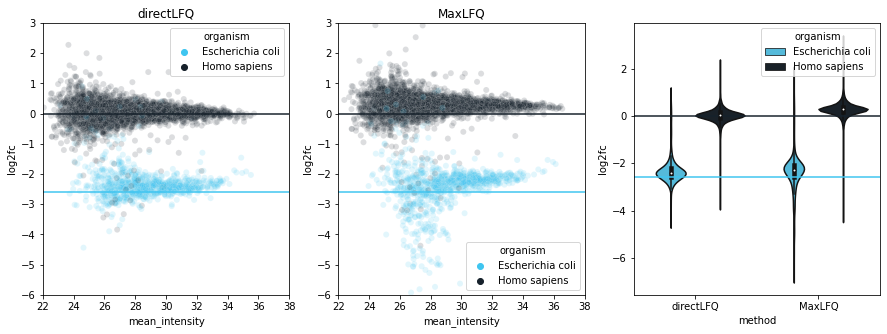

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import directlfq.visualizations as lfq_viz
import directlfq.benchmarking as lfq_benchmark
import numpy as np

methodname2resultsdf = {'directLFQ' : restable_directlfq.formated_dataframe, 'MaxLFQ' : restable_maxlfq.formated_dataframe}
organisms_to_plot =["Escherichia coli", "Homo sapiens"]
fcs_to_expect= [-np.log2(6), 0]

fig, axes = plt.subplots(1, 3,figsize=(15,5))


fcplotter_directLFQ = lfqbenchmark.MultiOrganismIntensityFCPlotter(ax=axes[0], resultstable_w_ratios=restable_directlfq, organisms_to_plot = organisms_to_plot, fcs_to_expect= fcs_to_expect, title="directLFQ")

fcplotter_maxLFQ = lfqbenchmark.MultiOrganismIntensityFCPlotter(ax=axes[1], resultstable_w_ratios= restable_maxlfq, organisms_to_plot = organisms_to_plot,  fcs_to_expect= fcs_to_expect, title= "MaxLFQ")

merged_table = lfq_benchmark.ResultsTableMerger(method_name2results_df=methodname2resultsdf).merged_table

lfq_viz.MultiOrganismMultiMethodBoxPlot(method_ratio_results_table=merged_table, ax = axes[2], organisms_to_plot=organisms_to_plot,fcs_to_expect= fcs_to_expect)

axes[0].set_ylim([-6, 3])
axes[0].set_xlim([22, 38])
axes[1].set_ylim([-6, 3])
axes[1].set_xlim([22, 38])

fig.savefig(benchmark_figure)

In [43]:
class ResultsTableMerger():
    def __init__(self, method_name2results_df):
        self._method_name2results_df = method_name2results_df
        self._list_of_tables = []

        self.merged_table = None

        self._define_merged_table()

    def _define_merged_table(self):
        self._collect_list_of_annotated_tables()
        self.merged_table = pd.concat(self._list_of_tables)
        self._filter_merged_table_for_valid_fcs()
    
    def _collect_list_of_annotated_tables(self):
        for method, df in self._method_name2results_df.items():
            self._add_method_column(method, df)
            self._list_of_tables.append(df)

    def _filter_merged_table_for_valid_fcs(self):
        is_valid = [np.isfinite(x) for x in self.merged_table["log2fc"]]
        self.merged_table = self.merged_table[is_valid]

    @staticmethod
    def _add_method_column(method, df):
        df["method"] = method
    
